# Задача 5.1

In [1]:
import numpy as np
import math as mth
import scipy.optimize as opt
import scipy.stats as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Итак, вектор $\space\xi =(\xi_1,\xi_2)\space$ имеет двумерное нормальное распределение с параметрами $$ a = \left(\begin{array}{c}0\\0\end{array}\right) \qquad\qquad  \varSigma = \left(\begin{array}{cc}10&8\\8&10\end{array}\right)$$ 
### Построение графика плотности $\xi$

In [2]:
grid = np.mgrid[-3:3:0.05, -3:3:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

Закраска плоскости

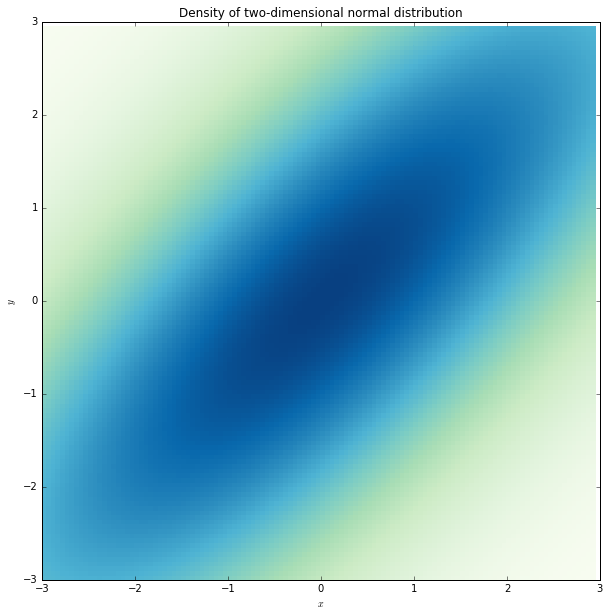

In [3]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='GnBu')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Density of two-dimensional normal distribution')

3х-мерный график

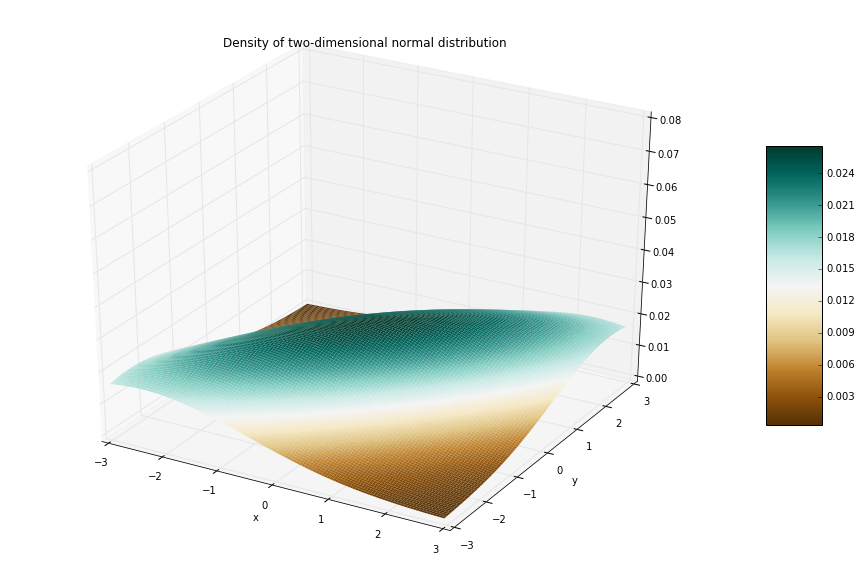

In [4]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1],density, rstride=1, cstride=1, cmap='BrBG', linewidth=0, antialiased=True)
plt.title('Density of two-dimensional normal distribution')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlim(0, 0.08)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Условная плотность $(\xi_1|\xi_2)$

In [5]:
def condens(x, y):
    return sps.multivariate_normal.pdf((x, y), mean=[0, 0], cov=[[10, 8], [8, 10]])/sps.norm.pdf(y, scale=10)

##### Построение графиков при различных значениях y

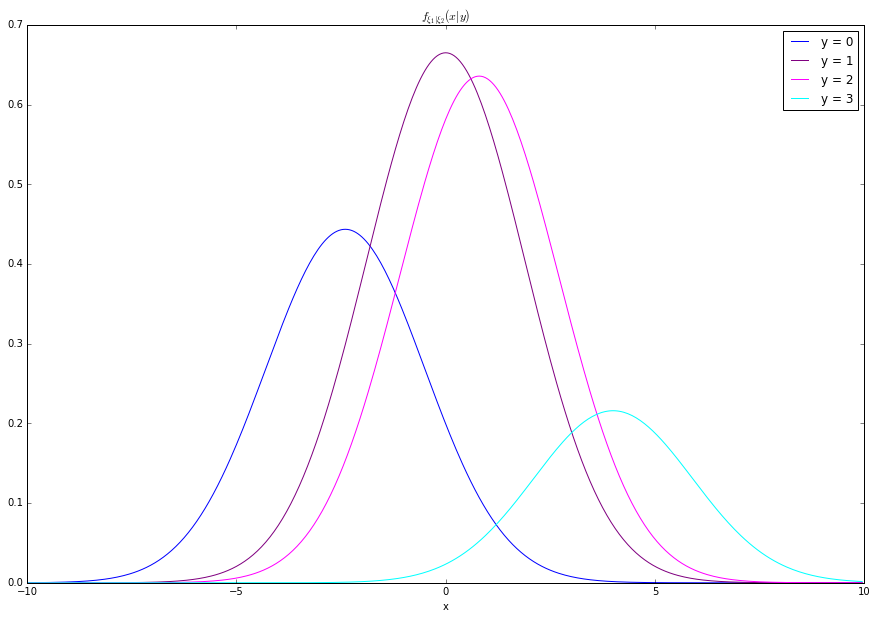

In [6]:
plt.figure(figsize=(15, 10))
plt.title(r'$f_{\xi_1|\xi_2}(x|y)$')
grid = np.arange(-10, 10, 0.05)
colors = ['blue', 'purple', 'magenta', 'cyan']
i = 0
for y in [-3, 0, 1, 5]:
    dens = list();
    for x in grid:
        dens.append(condens(x, y))
    plt.plot(grid, dens, color=colors[i], linewidth=1, label='y = '+str(i))
    i += 1
plt.legend()
plt.xlabel('x')
plt.show()

### Условное матожидание $(\xi_1|\xi_2)$

Представляю $\xi_1$ как $\xi_1 - \frac{4}{5}\xi_2 + \frac{4}{5}\xi_2$, тогда по линейности матожидания: $$ E(\xi_1|\xi_2) = E(\xi_1 - \frac{4}{5}\xi_2|\xi_2) + E(\frac{4}{5}\xi_2|\xi_2) = E(\xi_1 - \frac{4}{5}\xi_2) + \frac{4}{5}\xi_2$$ так как первое слагаемое независимо с $\xi_2$ (следует из обращения в 0 их ковариации). 
В итоге $$ E(\xi_1|\xi_2) = \frac{4}{5}\xi_2$$

In [7]:
def condexp(y):
    return 4/5*y

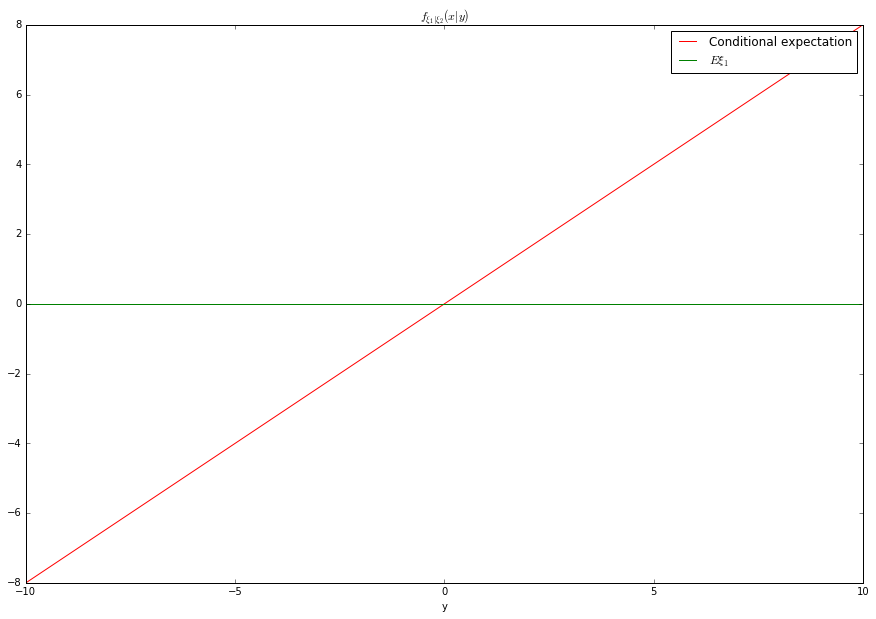

In [8]:
plt.figure(figsize=(15, 10))
plt.title(r'$f_{\xi_1|\xi_2}(x|y)$')
grid = np.arange(-10, 10, 0.05)
plt.plot(grid, condexp(grid), color='red', linewidth=1, label='Conditional expectation')
plt.plot(grid, np.zeros(size(grid)), color='green', linewidth=1, label=r'$E\xi_1$')
plt.legend()
plt.xlabel('y')
plt.show()